plot validate loss/accuracy


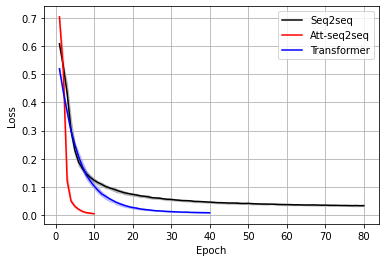

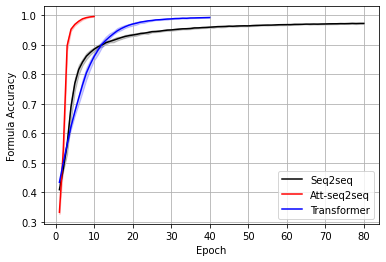

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt


model_list = ['seq2seq', 'attention', 'transformer']
seed_list = [100, 200, 300, 400, 500]

# validate loss
seq2seq_validate_loss_list = []
attention_validate_loss_list = []
transformer_validate_loss_list = []
# validate accuracy
seq2seq_validate_acc_list = []
attention_validate_acc_list = []
transformer_validate_acc_list = []
# inner test accuracy
seq2seq_inner_test_acc_list = []
attention_inner_test_acc_list = []
transformer_inner_test_acc_list = []
# extrapolate test accuracy
seq2seq_extrapolate_test_acc_list = []
attention_extrapolate_test_acc_list = []
transformer_extrapolate_test_acc_list = []


def find_mean_min_max(input_list):
    compare_times = len(input_list[0])
    mean_list = []
    min_list = []
    max_list = []
    temp_list = []

    for i in range(compare_times):
        for j in range(len(input_list)):
            temp_list.append(input_list[j][i])
        mean_list.append(np.mean(temp_list))
        min_list.append(min(temp_list))
        max_list.append(max(temp_list))
        temp_list = []

    return [mean_list, min_list, max_list]


def plot_loss(s_loss_mean_min_max_list, a_loss_mean_min_max_list, t_loss_mean_min_max_list):
    s = np.arange(len(s_loss_mean_min_max_list[0])) + 1
    plt.plot(s, s_loss_mean_min_max_list[0], 'k-', label='Seq2seq')
    plt.fill_between(s, s_loss_mean_min_max_list[1], s_loss_mean_min_max_list[2], color='k', alpha=0.2)

    a = np.arange(len(a_loss_mean_min_max_list[0])) + 1
    plt.plot(a, a_loss_mean_min_max_list[0], 'r-', label='Att-seq2seq')
    plt.fill_between(a, a_loss_mean_min_max_list[1], a_loss_mean_min_max_list[2], color='r', alpha=0.2)

    t = np.arange(len(t_loss_mean_min_max_list[0])) + 1
    plt.plot(t, t_loss_mean_min_max_list[0], 'b-', label='Transformer')
    plt.fill_between(t, t_loss_mean_min_max_list[1], t_loss_mean_min_max_list[2], color='b', alpha=0.2)

    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()
    plt.grid()
    plt.savefig('loss.pdf', bbox_inches='tight')
    plt.show()


def plot_acc(s_acc_mean_min_max_list, a_acc_mean_min_max_list, t_acc_mean_min_max_list):
    s = np.arange(len(s_acc_mean_min_max_list[0])) + 1
    plt.plot(s, s_acc_mean_min_max_list[0], 'k-', label='Seq2seq')
    plt.fill_between(s, s_acc_mean_min_max_list[1], s_acc_mean_min_max_list[2], color='k', alpha=0.2)

    a = np.arange(len(a_acc_mean_min_max_list[0])) + 1
    plt.plot(a, a_acc_mean_min_max_list[0], 'r-', label='Att-seq2seq')
    plt.fill_between(a, a_acc_mean_min_max_list[1], a_acc_mean_min_max_list[2], color='r', alpha=0.2)

    t = np.arange(len(t_acc_mean_min_max_list[0])) + 1
    plt.plot(t, t_acc_mean_min_max_list[0], 'b-', label='Transformer')
    plt.fill_between(t, t_acc_mean_min_max_list[1], t_acc_mean_min_max_list[2], color='b', alpha=0.2)

    plt.xlabel('Epoch')
    plt.ylabel('Formula Accuracy')

    plt.legend()
    plt.grid()
    plt.savefig('acc.pdf', bbox_inches='tight')
    plt.show()


if __name__ == '__main__':
    # load data
    for model in model_list:
        for seed in seed_list:
            path = './' + model + '/record/' + str(seed) + '/info_dict'
            info_dict = torch.load(path)
            if model == 'seq2seq':
                seq2seq_validate_loss_list.append(info_dict['validate_loss_list'])
                seq2seq_validate_acc_list.append(info_dict['validate_acc_list'])
                seq2seq_inner_test_acc_list.append(info_dict['inner_test_acc'])
                seq2seq_extrapolate_test_acc_list.append(info_dict['extrapolate_test_acc'])
            elif model == 'attention':
                attention_validate_loss_list.append(info_dict['validate_loss_list'])
                attention_validate_acc_list.append(info_dict['validate_acc_list'])
                attention_inner_test_acc_list.append(info_dict['inner_test_acc'])
                attention_extrapolate_test_acc_list.append(info_dict['extrapolate_test_acc'])
            else:  # model == 'transformer'
                transformer_validate_loss_list.append(info_dict['validate_loss_list'])
                transformer_validate_acc_list.append(info_dict['validate_acc_list'])
                transformer_inner_test_acc_list.append(info_dict['inner_test_acc'])
                transformer_extrapolate_test_acc_list.append(info_dict['extrapolate_test_acc'])

    # plot validate loss/accuracy
    print('plot validate loss/accuracy')
    seq2seq_loss_mean_min_max_list = find_mean_min_max(seq2seq_validate_loss_list)
    attention_loss_mean_min_max_list = find_mean_min_max(attention_validate_loss_list)
    transformer_loss_mean_min_max_list = find_mean_min_max(transformer_validate_loss_list)
    
    seq2seq_acc_mean_min_max_list = find_mean_min_max(seq2seq_validate_acc_list)
    attention_acc_mean_min_max_list = find_mean_min_max(attention_validate_acc_list)
    transformer_acc_mean_min_max_list = find_mean_min_max(transformer_validate_acc_list)
    
    plot_loss(seq2seq_loss_mean_min_max_list, attention_loss_mean_min_max_list, transformer_loss_mean_min_max_list)
    plot_acc(seq2seq_acc_mean_min_max_list, attention_acc_mean_min_max_list, transformer_acc_mean_min_max_list)